<a href="https://colab.research.google.com/github/aSafarpoor/NLP-HW2/blob/main/NLP_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

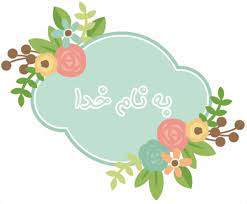

<center> NLP </center>
<center> HW-2 </center>
<br>
<center> Text Preprocessing </center>

Selected text is English.
<br>It is Friends series dialogues.
<br>Used link as a source is: https://fangj.github.io/friends/

# Used library

In [1]:
import urllib.request as urllib
import re
import matplotlib.pyplot as plt
import nltk
import pandas as pd 
from nltk import word_tokenize,sent_tokenize
import string

# Read and struct data

In [2]:
firstpartofurl = 'https://fangj.github.io/friends/season/'
secondpartofurl = {}
secondpartofurl[1] = list(range(101,125))
secondpartofurl[2] = list(range(201,225))
secondpartofurl[3] = list(range(301,326))
secondpartofurl[4] = list(range(401,424))
secondpartofurl[5] = list(range(501,524))
secondpartofurl[6] = list(range(601,625))
secondpartofurl[7] = list(range(701,725))
secondpartofurl[8] = list(range(801,824))
secondpartofurl[9] = list(range(901,923))
secondpartofurl[10] = list(range(1001,1017))

name_actors = ['Rachel','Chandler','Joey','Monica','Ross','Phoebe']

In [3]:
name_actors = ['Rachel','Chandler','Joey','Monica','Ross','Phoebe']
speaker_names = []
data_based_on_season_and_user = {}
data_based_on_season_and_user["Rachel"] = []
data_based_on_season_and_user["Chandler"] = []
data_based_on_season_and_user["Joey"] = []
data_based_on_season_and_user["Monica"] = []
data_based_on_season_and_user["Ross"] = []
data_based_on_season_and_user["Phoebe"] = []
t = f = 0
for season in range(1,11):
    print(" season = " ,season)
    for i in secondpartofurl[season]:
      if i<1000:
        url = firstpartofurl+'0'+str(i)+'.html'
      else:
        url = firstpartofurl+str(i)+'.html'
      
      try:
        data = urllib.urlopen(url)
      except:
        print("not found ",url)
      
      
      for line in data: # files are iterable
        try:
          sline = line.decode("utf-8")
        except:
          continue

        try:
          if '<p><b>' in sline:
              user = re.findall('[a-zA-Z]+:</b>',sline)
              note = re.findall('</b>.+',sline)
              user = user[0]
              note = note[0]
              try:
                data_based_on_season_and_user[user[:-5]].append(note[4:-4])
              except:
                if user[:-5] not in speaker_names:
                  speaker_names.append(user[:-5])
          t+=1
        except:
          f+=1
          # pass
print(t,f)

 season =  1
 season =  2
not found  https://fangj.github.io/friends/season/0212.html
not found  https://fangj.github.io/friends/season/0213.html
 season =  3
 season =  4
 season =  5
 season =  6
not found  https://fangj.github.io/friends/season/0615.html
not found  https://fangj.github.io/friends/season/0616.html
 season =  7
not found  https://fangj.github.io/friends/season/0724.html
 season =  8
 season =  9
 season =  10
155715 643


In [4]:
speaker_names[2:7]

['Marsha', 'Carol', 'Geller', 'Susan', 'Barry']

In [5]:
print("percentage of exported info" , round(149208/(149208+7150)*100,2))

percentage of exported info 95.43


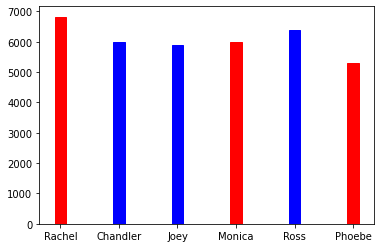

In [6]:
name = []
val = []
for key in data_based_on_season_and_user.keys():
  name.append(key)
  val.append(len(data_based_on_season_and_user[key]))
  # print(key," : ",len(data_based_on_season_and_user[key]))
p = plt.bar(name,val,width=0.2)
p[0].set_color('r')
p[1].set_color('b')
p[2].set_color('b')
p[3].set_color('r')
p[4].set_color('b')
p[5].set_color('r')
plt.show()

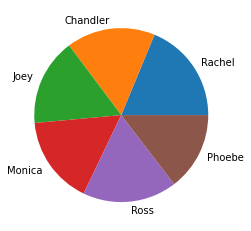

In [7]:
plt.pie(labels=name, x =val)
plt.show()

# Tokenization

In [8]:
# based of GeeksForGeeks: 
### https://www.geeksforgeeks.org/tokenize-text-using-nltk-python/
#just as an example / we will see its usage in next part
#from nltk.tokenize import word_tokenize,sent_tokenize

def tokenizer(sentence,word_tokenizing=True,sent_tokenizer=True):
      if not sent_tokenizer:
         return word_tokenize(sentence)
      try:
        sent_tok = sent_tokenize(sentence)
      except:
        nltk.download('punkt')
        sent_tok = sent_tokenize(sentence)
      if word_tokenizing:
        word_tok = word_tokenize(sentence)
        return sent_tok , word_tok
      return sent_tok

In [9]:
tokened_sample = tokenizer(data_based_on_season_and_user['Rachel'][1])
for t in tokened_sample:
  print(t)

[' Are you kidding?', "I'm trained for nothing!", 'I was laughed out of tw']
['Are', 'you', 'kidding', '?', 'I', "'m", 'trained', 'for', 'nothing', '!', 'I', 'was', 'laughed', 'out', 'of', 'tw']


#preprocessing

In [10]:
'''remove un-alphabetic characters / here we remove punctuation  marks too'''
# based of stackoverflow
def remove_non_alphabetic(note):
  note = note.replace("...")
  clear_note = regex.sub(' ', note)
  return clear_note

In [11]:
'''remove un-alphabetic characters / here we remove punctuation  marks too'''
# based of stackoverflow
def remove_non_alphabetic(note):
  regex = re.compile('[^a-zA-Z]')
  clear_note = regex.sub(' ', note)
  return clear_note

In [12]:
'''lowercase characters'''
def lower_case_of_list(inlist):
  out = [x.lower() for x in inlist]
  return out

In [13]:
'''clear stopwords and not clear words such as singulars'''
# mainly based on https://github.com/language-ml/1-nlp-exploring-datasets/blob/main/notebooks/
def stopword_removal(note_list):
  try:
    stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
  except:
    nltk.download('stopwords')
    stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]

  out_list = []
  for note in note_list:
    new = ""
    for word in note.split():
      if len(word) != "":
         if word not in stopwords:
            new+=word[:] + " "
    out_list.append(new)
  return out_list
# print(stopword_removal(['how you doing ali','are you ok ali']))

In [14]:
# def lol(list_):
#     normalized_sents=[[word for word in sentence 
#                             if word not in string.punctuation] 
#                               for sentence in list_ ]
#     return normalized_sents

# list_ = ['hi ali i am hear','lol how care?']
# print(lol(list_))

In [15]:
'''  clear_less_than_three which is mostly useless or meaning less '''
def clear_less_than_three(note):
  out = ""
  for word in note.split():
    if len(word)>2:
      out += word+ " "
  return out

In [16]:
alphabetic_dictionary_with_stopwords = {}
alphabetic_dictionary_without_stopwords = {}
for key in data_based_on_season_and_user.keys():
  sub_list_temp = []
  for note in data_based_on_season_and_user[key]:
    non_alph_note = remove_non_alphabetic(note) # remove un-alphabetic characters
    cleared_shorts = clear_less_than_three(non_alph_note)
    sub_list_temp.append(cleared_shorts[:])
   
  sub_list_temp = lower_case_of_list(sub_list_temp)[:] # lowercase
  alphabetic_dictionary_with_stopwords[key] = sub_list_temp[:]
  
  sub_list_temp = stopword_removal(sub_list_temp)
  alphabetic_dictionary_without_stopwords[key] = sub_list_temp[:]

In [17]:
statistics = {}
for name in name_actors:
  
  sentense_len_with = 0
  sentense_len_without = 0
  counter_sent_with = 0
  counter_sent_without = 0

  word_len_without = 0
  counter_word_without = 0
  word_10_14 = 0
  word_15_   = 0

  for note in alphabetic_dictionary_with_stopwords[name]:
    sent_tok , word_tok = tokenizer(note)
    sentense_len_with += len(word_tok)
    counter_sent_with += len(sent_tok)

  for note in alphabetic_dictionary_without_stopwords[name]:
    sent_tok , word_tok = tokenizer(note)
    sentense_len_without += len(word_tok)
    counter_sent_without += len(sent_tok)

    for word in word_tok:
      word_len_without += len(word)
      if len(word)>=10:
        if len(word)<=14:
          word_10_14+=1
        else:
          word_15_+=1

    counter_word_without += len(word_tok)
  
  statistics[name] = [round(100 * (sentense_len_with-sentense_len_without)/sentense_len_with,2),
                      round(sentense_len_with/counter_sent_with,2), 
                      round(sentense_len_without/counter_sent_without,2),
                      round(word_len_without/counter_word_without,2), 
                      word_10_14,
                      word_15_,
                      round(100*(word_10_14+word_15_)/counter_word_without,2)]

# print( name ,':' ,end = " ")
'''
print("percentage_of_stop_words",
        "mean lenght of sentences with stop words" , 
        "mean lenght of sentences without stop words",
        "mean lenght of words",
        "number of long words in different size")'''
statistics 

{'Chandler': [39.17, 6.03, 3.83, 4.96, 423, 4, 1.97],
 'Joey': [37.74, 6.33, 4.05, 4.86, 329, 6, 1.46],
 'Monica': [40.27, 5.9, 3.69, 4.97, 350, 4, 1.71],
 'Phoebe': [38.75, 6.13, 3.88, 4.91, 358, 5, 1.86],
 'Rachel': [38.67, 5.96, 3.8, 4.85, 389, 6, 1.63],
 'Ross': [38.34, 6.04, 3.87, 4.97, 482, 7, 2.11]}

In [18]:
col_name = ['%sw','l+sw','l-sw','lw','f<15','f>=15','%M/M+m']
index_name = ['Chandler','Joey','Monica','Phoebe','Rachel','Ross']
data = [[39.17, 6.03, 3.83, 4.96, 423, 4, 1.97],
        [37.74, 6.33, 4.05, 4.86, 329, 6, 1.46],
        [40.27, 5.9, 3.69, 4.97, 350, 4, 1.71],
        [38.75, 6.13, 3.88, 4.91, 358, 5, 1.86],
        [38.67, 5.96, 3.8, 4.85, 389, 6, 1.63],
        [38.34, 6.04, 3.87, 4.97, 482, 7, 2.11]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = col_name,index=index_name)
  
# print dataframe.
df

,%sw,l+sw,l-sw,lw,f<15,f>=15,%M/M+m
Chandler,39.17,6.03,3.83,4.96,423,4,1.97
Joey,37.74,6.33,4.05,4.86,329,6,1.46
Monica,40.27,5.90,3.69,4.97,350,4,1.71
Phoebe,38.75,6.13,3.88,4.91,358,5,1.86
Rachel,38.67,5.96,3.80,4.85,389,6,1.63
Ross,38.34,6.04,3.87,4.97,482,7,2.11


In [19]:
#just a simple view
for i in range(5):
  print(alphabetic_dictionary_with_stopwords['Rachel'][i])
  print(alphabetic_dictionary_without_stopwords['Rachel'][i])

guess what 
guess 
are you kidding trained for nothing was laughed out 
kidding trained nothing laughed 
you would too you found john and david boots sale 
would found john david boots sale 
they new don need job don need parents 
new need job need parents 
credit card 
credit card 


# Part of speech

In [20]:
# based on https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/ 
def pos(sentence,manage_stopwords = True):
  tokenized = tokenizer(sentence,word_tokenizing=False)
  tagged = []
  for note in tokenized:
      wordsList = tokenizer(note,sent_tokenizer=False)
      if manage_stopwords:
        wordsList = stopword_removal(wordsList)
      try:
        newwordslist = [i for i in wordsList if i != '']
        tagged = nltk.pos_tag(newwordslist)
      except:
        print(note,wordsList)
        newwordslist = [i for i in wordslist if i != '']
        nltk.download('averaged_perceptron_tagger')
        tagged = nltk.pos_tag(newwordslist)
        
  return tagged

In [21]:
tagged_list = {}

for name in name_actors:
  tagged_list[name] = []
  for note in alphabetic_dictionary_with_stopwords[name]:
    tagged = pos(note,manage_stopwords=False)
    tagged_list[name].append(tagged)
for i in tagged_list["Ross"][1:50]:
  print(i)

[('you', 'PRP'), ('got', 'VBD'), ('job', 'NN')]
[('the', 'DT'), ('word', 'NN'), ('you', 'PRP'), ('looking', 'VBG'), ('for', 'IN'), ('anyway', 'NN')]
[('mon', 'NN'), ('cut', 'NN'), ('cut', 'NN'), ('cut', 'NN'), ('cut', 'NN')]
[('got', 'VBD'), ('ta', 'JJ'), ('home', 'NN'), ('sometime', 'NN')]
[('yeah', 'NN')]
[('mmm', 'NN'), ('they', 'PRP'), ('both', 'DT'), ('reach', 'VBP'), ('for', 'IN'), ('the', 'DT'), ('last', 'JJ'), ('cookie', 'NN')]
[]
[('split', 'NN')]
[('okay', 'IN'), ('they', 'PRP'), ('split', 'VBP'), ('you', 'PRP'), ('know', 'VBP'), ('you', 'PRP'), ('probably', 'RB'), ('didn', 'VBP'), ('know', 'VB'), ('this', 'DT'), ('but', 'CC'), ('bac', 'NN')]
[('you', 'PRP'), ('did', 'VBD'), ('always', 'RB'), ('figured', 'VBN'), ('you', 'PRP'), ('just', 'RB'), ('thought', 'VBN'), ('was', 'VBD'), ('monica', 'JJ')]
[('listen', 'VB'), ('you', 'PRP'), ('think', 'VBP'), ('and', 'CC'), ('try', 'VBP'), ('not', 'RB'), ('let', 'VB'), ('intense', 'JJ'), ('vulnerabi', 'NN')]
[('okay', 'JJ'), ('okay', 'N

In [22]:
tagged_list = {}

for name in name_actors:
  tagged_list[name] = []
  for note in alphabetic_dictionary_with_stopwords[name]:
    tagged = pos(note,manage_stopwords=True)
    tagged_list[name].append(tagged)
for i in tagged_list["Ross"][1:50]:
  print(i)

[('got ', 'NN'), ('job ', 'NN')]
[('word ', 'NN'), ('looking ', 'NN'), ('anyway ', 'NN')]
[('mon ', 'NN'), ('cut ', 'NN'), ('cut ', 'NN'), ('cut ', 'NN'), ('cut ', 'NN')]
[('got ', 'NN'), ('ta ', 'NN'), ('home ', 'NN'), ('sometime ', 'NN')]
[('yeah ', 'NN')]
[('mmm ', 'NN'), ('reach ', 'NN'), ('last ', 'NN'), ('cookie ', 'NN')]
[]
[('split ', 'NN')]
[('okay ', 'JJ'), ('split ', 'NN'), ('know ', 'NN'), ('probably ', 'NN'), ('know ', 'NN'), ('bac ', 'NN')]
[('always ', 'NN'), ('figured ', 'NN'), ('thought ', 'NN'), ('monica ', 'NN')]
[('listen ', 'NN'), ('think ', 'NN'), ('try ', 'NN'), ('let ', 'NN'), ('intense ', 'NN'), ('vulnerabi ', 'NN')]
[('okay ', 'JJ'), ('okay ', 'NN'), ('maybe ', 'NN')]
[('goodnight ', 'NN')]
[('grabbed ', 'NN'), ('spoon ', 'NN'), ('ross ', 'NN'), ('exits ', 'NN'), ('monica ', 'NN'), ('idea ', 'NN')]
[('yeah ', 'NN'), ('like ', 'NN'), ('comedian ', 'NN'), ('tha ', 'NN')]
[('good ', 'NN'), ('good ', 'NN'), ('seem ', 'NN')]
[]
[('marsha ', 'NN'), ('cave ', 'NN'), 

# Byte Pair Encoding (BPE) 

In [23]:
def counter(bag):
  d= []
  rules = []
  alphabets = list(string.ascii_lowercase) + ['_']
  for a in alphabets:
    if bag.count(a)>0:
      d.append([a,bag.count(a)])
      rules.append(a)

  for i in range(1,1+1000):
    
    lendold = len(d)
    t = 0
    while(len(d) == lendold and t<len(d)-2):
      lendold = len(d)
      d.sort(key=lambda x:x[1]*1000000+len(x[0]))
      d=d[::-1]
      x1 = d[t][0]
      x2 = d[t+1][0]
      x1x2 = x1+x2
      x2x1 = x2+x1
      temp = bag[:]
      count1= count2 = 0
      if x1x2 not in rules:
        count1 = bag.count(x1x2)
        if count1>0:
          temp = temp.replace(x1x2,'*')
          d[t][1] -= count1 
          d[t+1][1] -= count1 
          rules.append(x1x2)
          d.append([x1x2,count1])
      if x2x1 not in rules:
        count2 = temp.count(x2x1)
        if count2>0:
          d[t][1] -=  count2
          d[t+1][1] -= count2
          rules.append(x2x1)
          d.append([x2x1,count2])
      if d[t][1]<1:
        del(d[t])
      if d[t+1][1]<1:
        del(d[t+1])
      t+=1

  d.sort(key=lambda x:x[1]*1000000+len(x[0]))
  return d[::-1]

def bpe(list_of_sentences):
  bag = ""
  for note in list_of_sentences:
    words = tokenizer(note,sent_tokenizer=False)
    for word in words:
      bag+=word+'_'
  
  return counter(bag)
  


In [24]:
for name in name_actors[1:2]:
  bag = alphabetic_dictionary_with_stopwords[name]
  bpe_ = bpe(bag)
  

In [25]:
t = 0
for i in bpe_:
  if len(i[0])>1:
    print(i)
    t+=1
  if t>10:
    break

['_th', 3696]
['you', 2123]
['the', 1705]
['u_', 1681]
['ing', 1593]
['hat_', 1520]
['on', 1507]
['_d', 1330]
['d_', 1327]
['l_', 1296]
['_l', 1206]


In [26]:
t = 0
for i in bpe_:
  if len(i[0])>4:
    print(i)
    t+=1
  if t>10:
    break

['t_are_', 69]
['use_t', 28]
['he_ma', 25]
['u_the', 23]
['sees_', 19]
['e_goi', 19]
['e_gir', 17]
['hat_on', 12]
['ain_t', 10]
['re_se', 10]
['st_and_', 7]


# bpe costomized for words

In [33]:
def counter_for_word(bag):
  d= []
  rules = []
  # alphabets = list(string.ascii_lowercase) + ['_']
  for word in bag.split():
    if word not in rules:
      rules.append(word)
  for word in rules:
    if bag.count(word)>0:
      d.append([word,bag.count(word)])
      # rules.append(word)
  c=1000;print(c)
  for i in range(1,1+1000):
    
    lendold = len(d)
    t = 0
    c-=1
    print(c,end=' ');
    while(c>0 and len(d) == lendold and t<len(d)-2):
      
      lendold = len(d)
      d.sort(key=lambda x:x[1]*1000000+len(x[0]))
      d=d[::-1]
      x1 = d[t][0]
      x2 = d[t+1][0]
      x1x2 = x1+x2
      x2x1 = x2+x1
      temp = bag[:]
      count1= count2 = 0
      if x1x2 not in rules:
        count1 = bag.count(x1x2)
        if count1>0:
          temp = temp.replace(x1x2,'*')
          d[t][1] -= count1 
          d[t+1][1] -= count1 
          rules.append(x1x2)
          d.append([x1x2,count1])
      if x2x1 not in rules:
        count2 = temp.count(x2x1)
        if count2>0:
          d[t][1] -=  count2
          d[t+1][1] -= count2
          rules.append(x2x1)
          d.append([x2x1,count2])
      if d[t][1]<1:
        del(d[t])
      if d[t+1][1]<1:
        del(d[t+1])
      t+=1

  d.sort(key=lambda x:x[1]*1000000+len(x[0]))
  return d[::-1]

def bpe_for_word(list_of_sentences):
  bag = ""
  for note in list_of_sentences:
    words = tokenizer(note,sent_tokenizer=False)
    for word in words:
      bag+=word+' '
  
  return counter_for_word(bag)
  


In [ ]:
for name in name_actors[1:2]:
  bag = alphabetic_dictionary_with_stopwords[name]
  bpe_word = bpe_for_word(bag)


In [ ]:
# print(rules)

In [ ]:
print(bpe_word[:10])
t = 0
for i in bpe_word:
  if len(i[0])>4:
    print(i)
    t+=1
  if t>10:
    break

not a good way ☹ <br>
our init list is too long <br>
no chance to solve it in suitable time. 